<a href="https://colab.research.google.com/github/Nyota-Lab/torch/blob/Regresion-lineal/Regresion_Lineal_con_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresion Lineal
* Importamos nuestras librerias
* Importamos torch.nn que es un modulo específico de Pytorch que nos ayuda a crear redes neuronales
* Importamos torch.optim para mejorar la optimizacion de nuestro modelo y calcular los gradientes


In [0]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

* Para este primer ejemplo vamos a crear arreglos para simular un dataframe de venta de autos según su precio

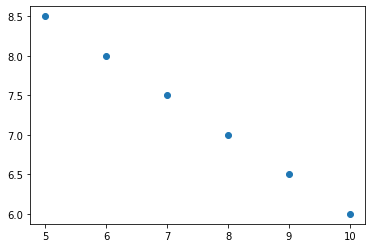

In [3]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7, 6.5, 6]

plt.scatter(car_prices, units_sold)

* una vez tenemos este arreglo de pyton vamos a transformarlo en un array de numpy

In [4]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)
print(prices_array)
print(units_array)

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[8.5]
 [8. ]
 [7.5]
 [7. ]
 [6.5]
 [6. ]]


* Ya que lo tenemos en formato numpy vamos a transformarlo a tensor, con la diferencia que a los precios como van a ser nuestra variable explicativa le vamos a activar los gradientes para la optimizacion y para las unidades no lo vamos a hacer

In [5]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

print(prices, prices.shape)
print(units, units.shape)

tensor([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], requires_grad=True) torch.Size([6, 1])
tensor([[8.5000],
        [8.0000],
        [7.5000],
        [7.0000],
        [6.5000],
        [6.0000]]) torch.Size([6, 1])


* Procedemos con la creacion del modelo lineal el cual va a recibir el parámetro de la dimension de la entrada y de la salida
* Definimos la función de pérdida que para este caso es MSELoss es decir la media del cuadrado de los errores
* Definimos la función de optimizacíon con SGD el cual toma un batch de los datos, como parámetros le pasamos los pesos que tiene cada uno de nustros elementos en el modelo y agregamos un learning rate, es decir cuanto se va a mover el gradiente con cada iteracion
* Con estos parámetros establecidos creamos nuestro trainig loop
  * Vamos a crear un arreglo vacio llamado losses para poder graficar mas adelante y se va a llenar con los resultados que arroje el training loop
  * Establecemos un número de iteraciones para el loop
    * Creamos el training loop que va a tener las iteracciones y por cada una de ellas vamos a realizar una predicción con los precios como parámetros
    * Despues tenemos que calcular el loss en la cual usamos la función que ya creamos y le pasamos la prediccion que ya realizamos y el target, para que pueda calcular la diferencia entre lo que calculamos y el valor objetivo y lo vamos agregando a nuestro arreglo vacio
    * Despues es necesario reiniciar los gradientes porque son acumulativos y pueden distorcionar el modelo
    * De igual manera reiniciamos la funcion de loss
    * Y le pedimos que optimicer se mueva un 'paso' de acuerdo a la función de optimizacion
    * Para terminar graficamos las iteraciones junto con los losses

tensor(0.0181, grad_fn=<MseLossBackward>)


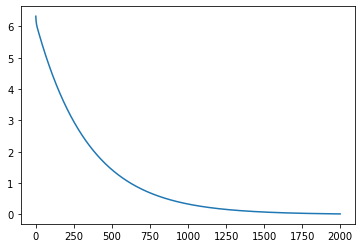

In [15]:
model = nn.Linear(1,1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 2000

for i in range(iterations):
  #forward pass
  pred = model(prices) 
  loss = loss_function(pred, units)
  losses.append(loss.data)

  #backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

* Una vez ya está entrenado nuestro modelo vamos a realizar una prediccion

In [25]:
X = torch.Tensor([[6.0]])
X = model(X)
X

tensor([[7.8554]], grad_fn=<AddmmBackward>)